In [1]:
import pandas as pd
import numpy as np

In [2]:
# load your data
df = pd.read_csv("https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/Seeds.csv")
names = list(df.columns) #Save column names

In [3]:
#Choose which data is featuers (X) and labels (y)
X = df[ ['area','compactness'] ].to_numpy()
y = df['wheat_type'].to_numpy()

Helper functions!

In [4]:
def train_test_split(X,y,test_percent):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_percent)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [5]:
def nn_classify_sample(train_features, train_labels, new_feature):
  dists = np.array([np.sum( (t-new_feature)**2) for t in train_features])
  nearest = dists.argmin()
  return train_labels[nearest]

def nn_classify(train_features, train_labels, test_features):
  num_result = test_features[:,0].size
  result = np.ones(num_result)
  for i in range(0,num_result):
    result[i] = nn_classify_sample(train_features[:,0:2], train_labels, test_features[i])
  return result

In [6]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [7]:
def avg_accuracy(classifier, X, y, count = 200, split=0.33):
  acc = 0
  for _ in range(0,count):
    X_train, X_test, y_train, y_test = train_test_split(X,y,split)
    acc += accuracy(classifier, X_train, y_train, X_test, y_test)
  return acc/count

test our nearest neighbor with our train/test split

In [8]:
# TODO: create a train/test split where 1/3 of the data is used for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)

In [9]:
# TODO: use our helper functions to compute the accuracy of a NN model with the above split
accuracy(nn_classify, X_train, y_train, X_test, y_test)

np.float64(0.8714285714285714)

In [10]:
# TODO: put both lines of code in the same block and run multiple times
# Q: Why does each run have different accuracies each run?
# A: Because the data is shuffled each time the split is made
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
accuracy(nn_classify, X_train, y_train, X_test, y_test)

np.float64(0.8)

KNN implementation

In [11]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# TODO: write a function that will use KNN to classify a whole array of test features
# Hint: use a wrapper function so that it fits within our accuracy helper function!
def knn_classifier(k):
    def knn_classify(x_train, y_train, x_test):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        pred = knn.predict(x_test)
        return pred
    return knn_classify

In [ ]:
# TODO: test it out with 2, 5, and 10 neighbors

X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
knn = knn_classifier(15)
print(knn)
accuracy(knn, X_train, y_train, X_test, y_test)


<function knn_classifier.<locals>.knn_classify at 0x000001F2F0EF6660>


np.float64(0.8714285714285714)

In [14]:
# TODO: test different amounts of neighbors with the cross-validation
X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
knn = knn_classifier(10)
accuracy(knn, X_train, y_train, X_test, y_test)

np.float64(0.8428571428571429)

Finding the best K

In [15]:
# TODO: find the best performing K testing every third value between 1 - 91
k_values = []
acc_values = []
best_k = 0
best_acc = 0
for k in range(1, 91, 3):
    knn = knn_classifier(k)
    acc = avg_accuracy(knn, X, y)
    k_values.append(k)
    acc_values.append(acc)
    if acc > best_acc:
        best_k = k
        best_acc = acc

In [16]:
import seaborn as sns

<Axes: >

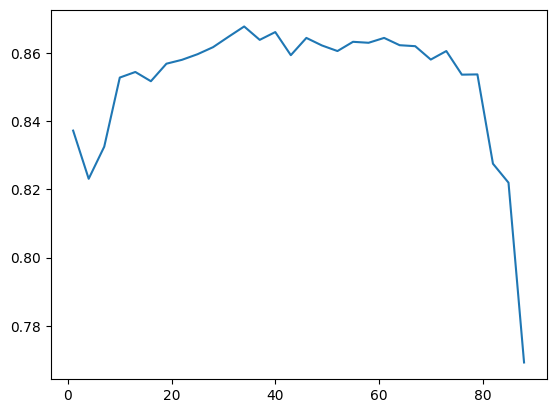

In [17]:
# TODO: use seaborn to plot a graph of the accuracies vs. ks
# Hint: use sns.lineplot
sns.lineplot(x=k_values, y=acc_values)

<Axes: xlabel='k', ylabel='accuracy'>

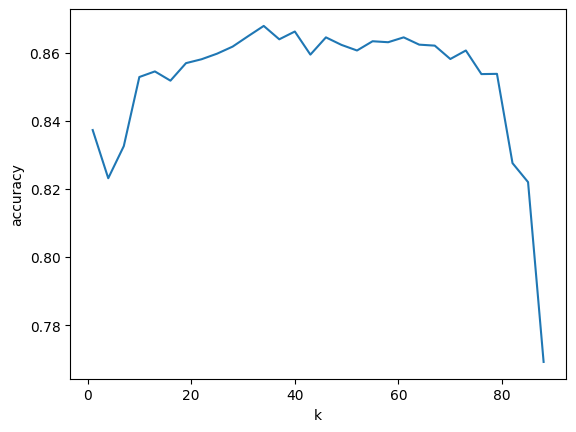

In [18]:
# If you have named dataframes, seaborn labels them auotmatically
# .... but this can be a pain sometimes
# TODO: lets turn our lists into dataframes so seaborn will label them
df = pd.DataFrame({'k': k_values, 'accuracy': acc_values})
sns.lineplot(data=df, x='k', y='accuracy')


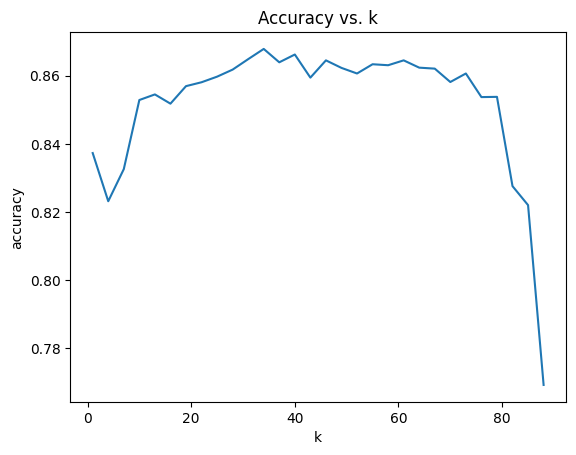

In [19]:
# Or we can just use matplotlibs pyplot package to control the labels and titles
# TODO: try it now!
# Hint: functions like plt.xlabel, plt.ylabel, and plt.title will be useful
import matplotlib.pyplot as plt
plt.plot(k_values, acc_values)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy vs. k')
plt.show()

In [20]:
# TODO: lets make another graph but this time lets compute the accuracy for both training and testing sets for different Ks
ks = np.arange(1,51)
test_acc_list = []
train_acc_list = []
for k_cur in ks:
    my_knn = knn_classifier(k_cur)
    test_acc = 0
    train_acc = 0
    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X,y,0.33)
        test_acc += accuracy(my_knn, X_train, y_train, X_test, y_test)/20
        train_acc += accuracy(my_knn, X_train, y_train, X_train, y_train)/20
    test_acc_list.append(test_acc)
    train_acc_list.append(train_acc)

<Axes: xlabel='k', ylabel='value'>

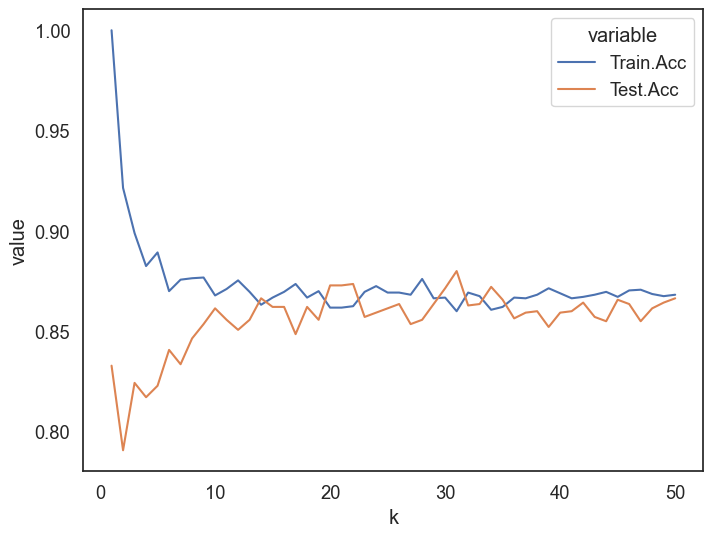

In [21]:
# helper for making a graph nicely
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))